In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/wikipedia-crypto-articles/Wikipedia Crypto Articles.csv")

**Can you show the distribution of article lengths in the dataset through a histogram?**

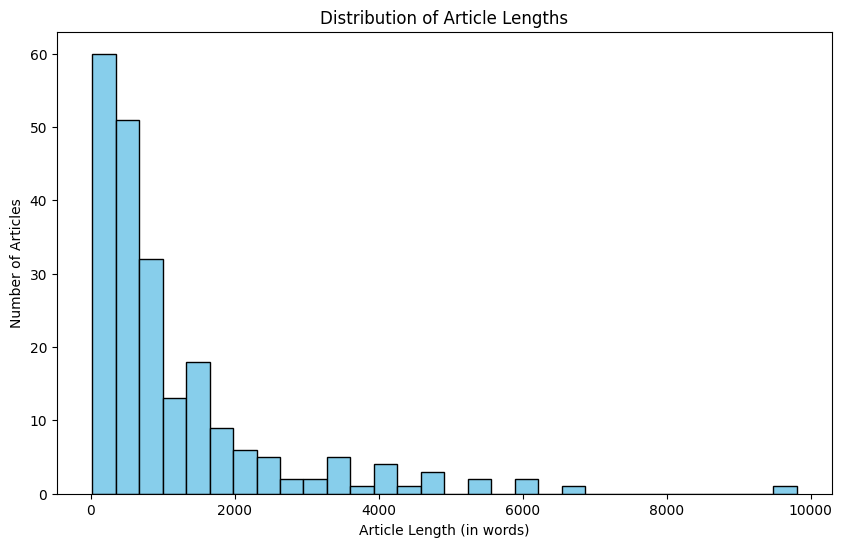

In [2]:
import matplotlib.pyplot as plt

# Check for NaN values in the 'article' column
df = df.dropna(subset=['article'])

# Calculate article lengths
df['article_length'] = df['article'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['article_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (in words)')
plt.ylabel('Number of Articles')
plt.show()


**What are the top 10 most common words in the entire dataset?**

In [3]:
 
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit and transform the articles
word_counts = vectorizer.fit_transform(df['article'])

# Get feature names and corresponding counts
feature_names = vectorizer.get_feature_names_out()
word_counts = word_counts.sum(axis=0)

# Create a dataframe for top words
top_words_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.tolist()[0]})

# Display top 10 words
top_words_df = top_words_df.sort_values(by='Count', ascending=False)
print("Top 10 most common words:")
print(top_words_df.head(10))


Top 10 most common words:
             Word  Count
1         bitcoin   1862
4  cryptocurrency    979
2      blockchain    837
3         company    635
5         digital    604
7         million    553
9            used    530
6        exchange    519
8         network    509
0            2021    506


**Can you visualize the distribution of article lengths for specific cryptocurrencies (e.g., Bitcoin, Ethereum)?**

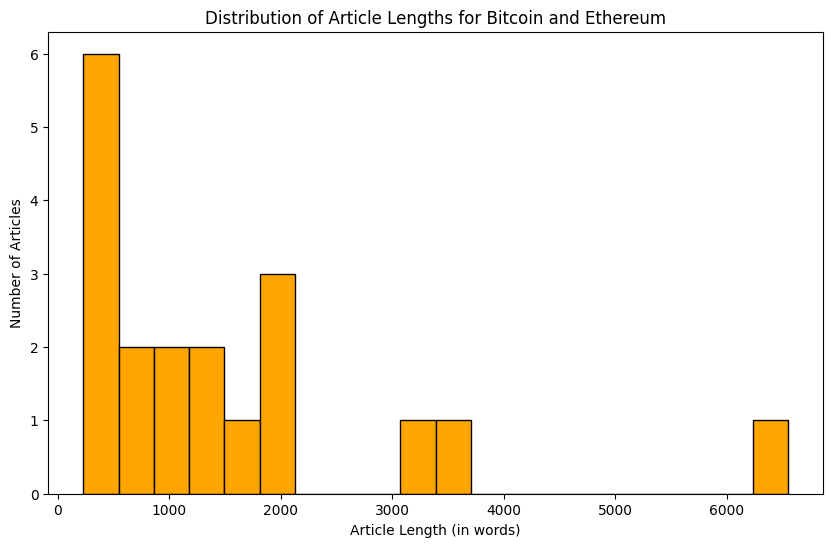

In [4]:
 
crypto_articles = df[df['title'].str.contains('Bitcoin|Ethereum', case=False)]

# Plot histogram for specific cryptocurrencies
plt.figure(figsize=(10, 6))
plt.hist(crypto_articles['article_length'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Article Lengths for Bitcoin and Ethereum')
plt.xlabel('Article Length (in words)')
plt.ylabel('Number of Articles')
plt.show()


**Number of Articles per Cryptocurrency**

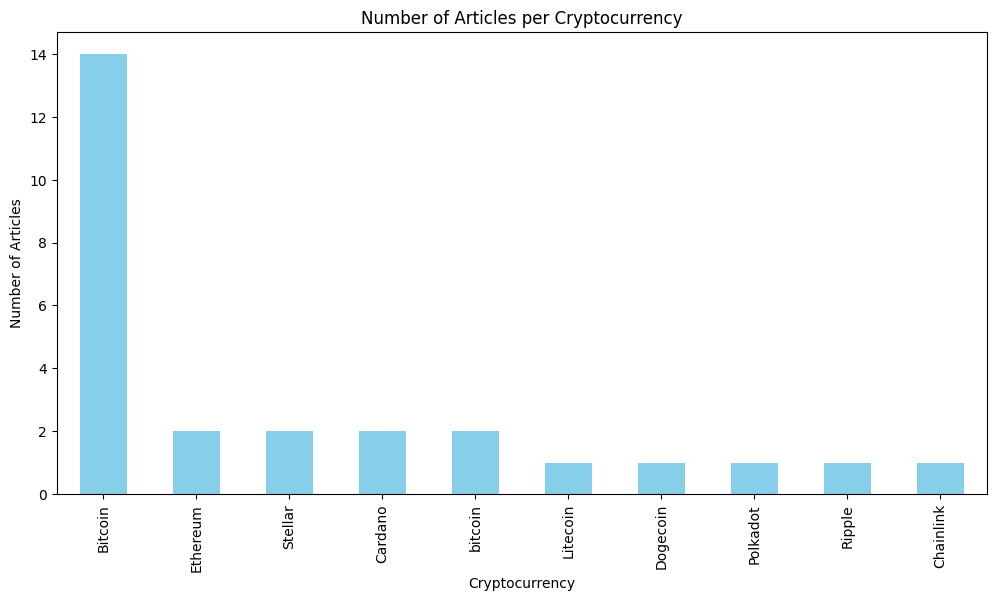

In [5]:
import re
crypto_counts = df['title'].str.extract(r'(\bBitcoin\b|\bEthereum\b|\bRipple\b|\bLitecoin\b|\bCardano\b|\bPolkadot\b|\bStellar\b|\bDogecoin\b|\bChainlink\b|\bBitcoin Cash\b)', flags=re.IGNORECASE, expand=False)
crypto_counts = crypto_counts.value_counts()

plt.figure(figsize=(12, 6))
crypto_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number of Articles')
plt.show()


**Number of Articles by Article Type (Crypto vs. Non-Crypto)**

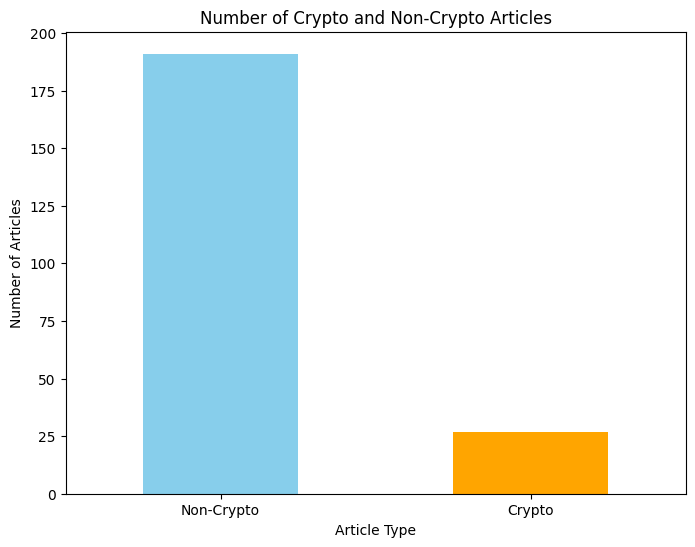

In [6]:

df['is_crypto'] = df['title'].str.contains(r'\bBitcoin\b|\bEthereum\b|\bRipple\b|\bLitecoin\b|\bCardano\b|\bPolkadot\b|\bStellar\b|\bDogecoin\b|\bChainlink\b|\bBitcoin Cash\b', flags=re.IGNORECASE, regex=True)

article_type_counts = df['is_crypto'].value_counts()

plt.figure(figsize=(8, 6))
article_type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Crypto and Non-Crypto Articles')
plt.xlabel('Article Type')
plt.ylabel('Number of Articles')
plt.xticks([0, 1], ['Non-Crypto', 'Crypto'], rotation=0)
plt.show()


**Top 10 Most Common Words**

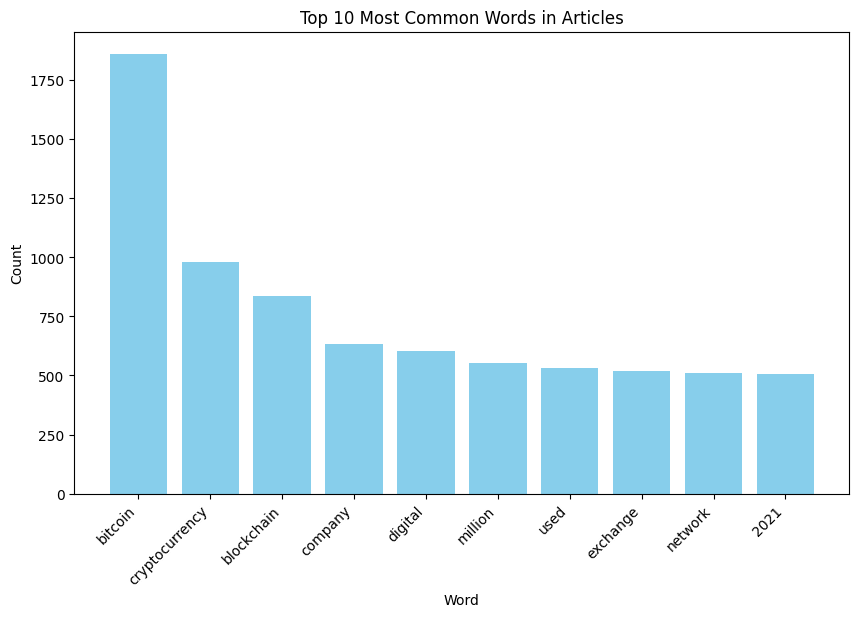

In [7]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(df['article'])
feature_names = vectorizer.get_feature_names_out()
word_counts = word_counts.sum(axis=0)

top_words_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.tolist()[0]})
top_words_df = top_words_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.title('Top 10 Most Common Words in Articles')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Distribution of Article Lengths for Specific Cryptocurrenciesd**

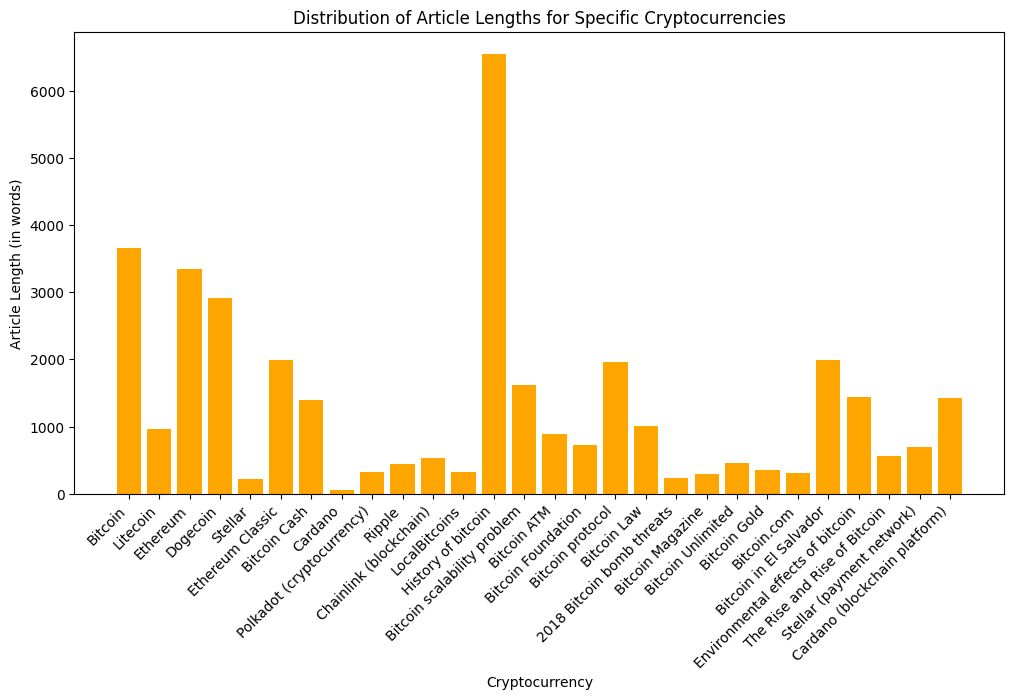

In [8]:
crypto_articles = df[df['title'].str.contains('Bitcoin|Ethereum|Litecoin|Ripple|Cardano|Polkadot|Stellar|Dogecoin|Chainlink|Bitcoin Cash', case=False)]

plt.figure(figsize=(12, 6))
plt.bar(crypto_articles['title'], crypto_articles['article_length'], color='orange')
plt.title('Distribution of Article Lengths for Specific Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Article Length (in words)')
plt.xticks(rotation=45, ha='right')
plt.show()


**Number of Unique Titles for Each Cryptocurrency**

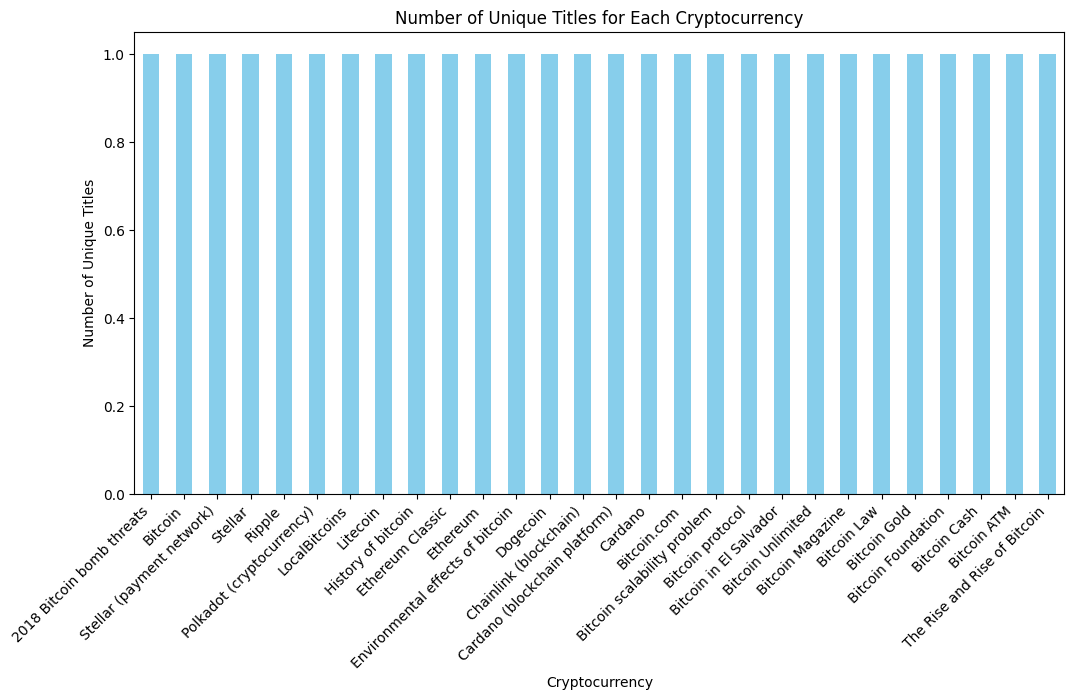

In [9]:
 
crypto_unique_titles = df[df['title'].str.contains('Bitcoin|Ethereum|Litecoin|Ripple|Cardano|Polkadot|Stellar|Dogecoin|Chainlink|Bitcoin Cash', case=False)]
crypto_unique_titles = crypto_unique_titles.groupby('title')['title'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
crypto_unique_titles.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Titles for Each Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


**Number of Articles Related to Historical Facts vs. Cryptocurrencies**

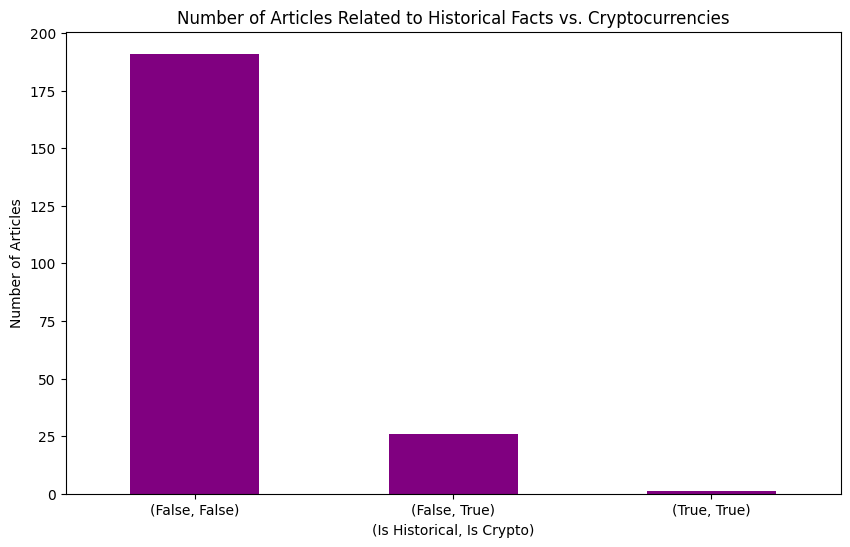

In [10]:
 
df['is_historical'] = df['title'].str.contains('history|historical|event', case=False, regex=True)

historical_vs_crypto_counts = df[['is_historical', 'is_crypto']].apply(lambda x: tuple(x), axis=1).value_counts()

plt.figure(figsize=(10, 6))
historical_vs_crypto_counts.plot(kind='bar', color='purple')
plt.title('Number of Articles Related to Historical Facts vs. Cryptocurrencies')
plt.xlabel('(Is Historical, Is Crypto)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()


**Number of Articles mentioning Companies in Cryptocurrency Space**

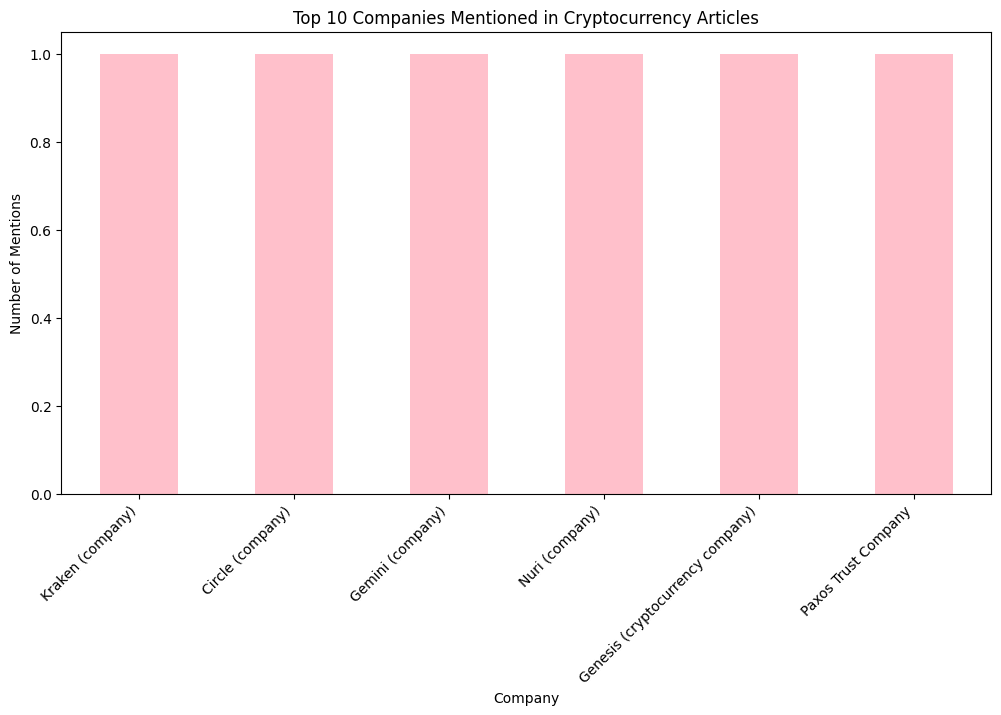

In [11]:
 
company_articles = df[df['title'].str.contains('company|corporation|enterprise|organization', case=False, regex=True)]

plt.figure(figsize=(12, 6))
company_counts = company_articles['title'].value_counts().head(10)
company_counts.plot(kind='bar', color='pink')
plt.title('Top 10 Companies Mentioned in Cryptocurrency Articles')
plt.xlabel('Company')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.show()


**Number of Articles mentioning Exchanges in Cryptocurrency Space**

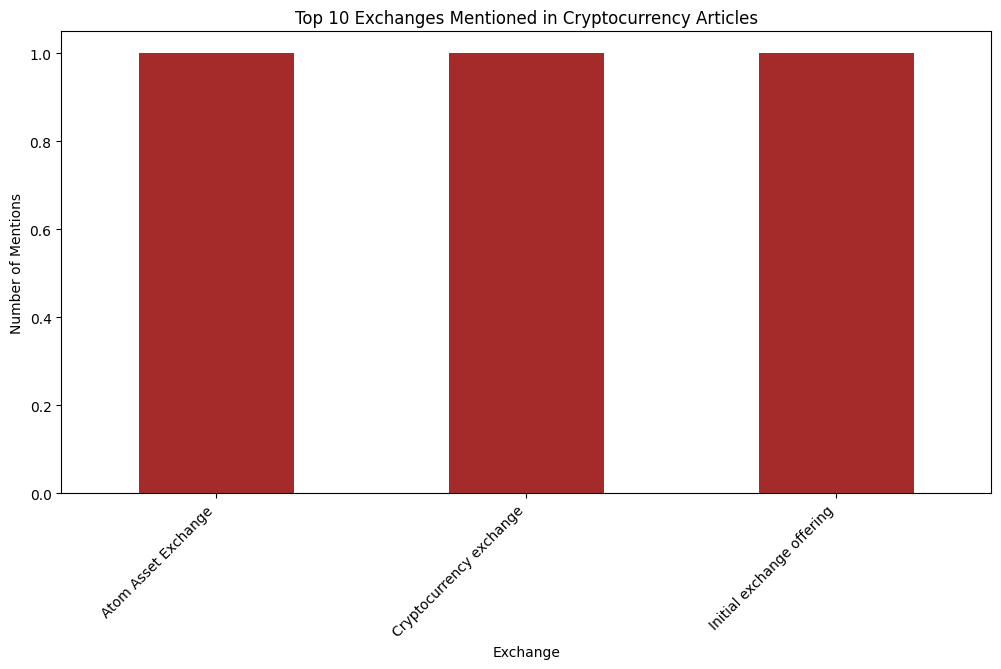

In [12]:
 
exchange_articles = df[df['title'].str.contains('exchange', case=False)]

plt.figure(figsize=(12, 6))
exchange_counts = exchange_articles['title'].value_counts().head(10)
exchange_counts.plot(kind='bar', color='brown')
plt.title('Top 10 Exchanges Mentioned in Cryptocurrency Articles')
plt.xlabel('Exchange')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.show()


**Relationship between Article Length and Number of Unique Titles**

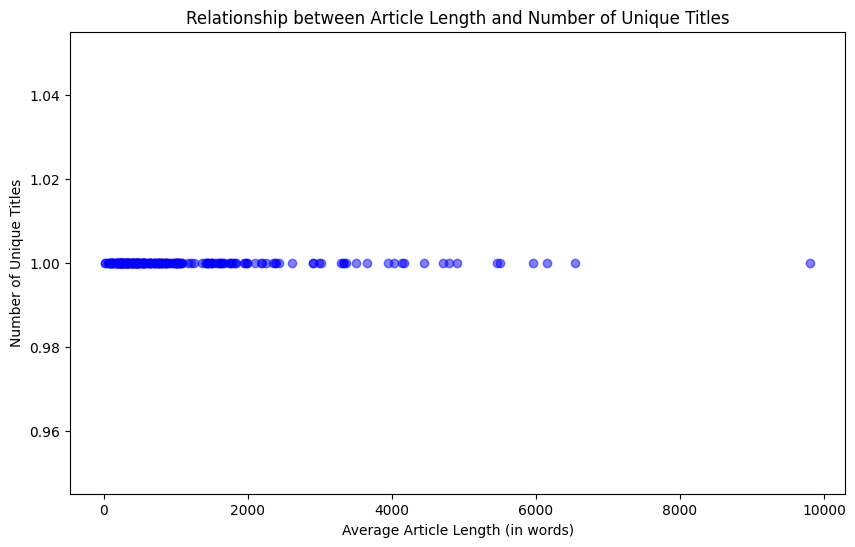

In [13]:
 
unique_titles_counts = df.groupby('title')['title'].count()
article_lengths_vs_titles = df.groupby('title')['article_length'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(article_lengths_vs_titles, unique_titles_counts, color='blue', alpha=0.5)
plt.title('Relationship between Article Length and Number of Unique Titles')
plt.xlabel('Average Article Length (in words)')
plt.ylabel('Number of Unique Titles')
plt.show()


**Distribution of Article Lengths vs. Number of Articles per Cryptocurrency**

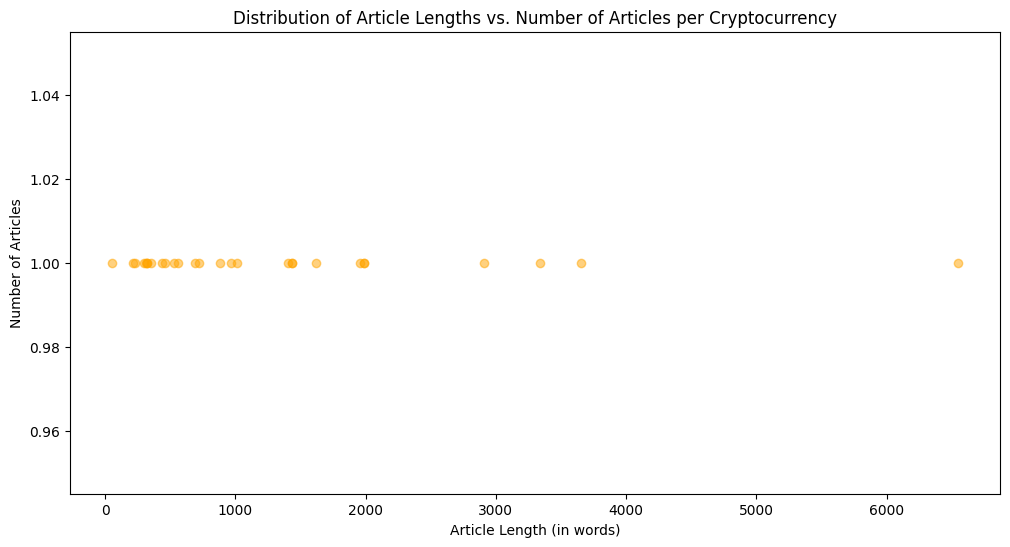

In [14]:
 
crypto_articles = df[df['title'].str.contains('Bitcoin|Ethereum|Litecoin|Ripple|Cardano|Polkadot|Stellar|Dogecoin|Chainlink|Bitcoin Cash', case=False)]

plt.figure(figsize=(12, 6))
plt.scatter(crypto_articles['article_length'], crypto_articles.groupby('title')['title'].count(), color='orange', alpha=0.5)
plt.title('Distribution of Article Lengths vs. Number of Articles per Cryptocurrency')
plt.xlabel('Article Length (in words)')
plt.ylabel('Number of Articles')
plt.show()


**Number of ArtiDistribution of Article Types (Crypto vs. Non-Crypto)**

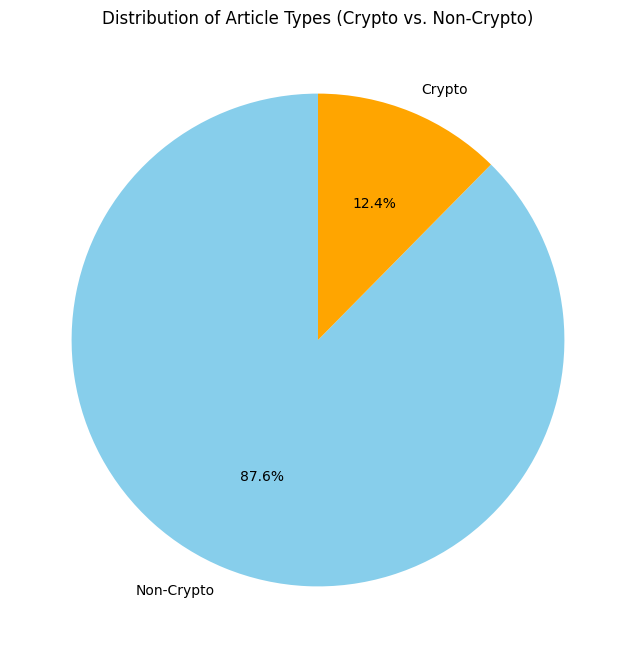

In [15]:
 article_type_counts = df['is_crypto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(article_type_counts, labels=['Non-Crypto', 'Crypto'], autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Distribution of Article Types (Crypto vs. Non-Crypto)')
plt.show()


**Distribution of Articles across Cryptocurrencies**

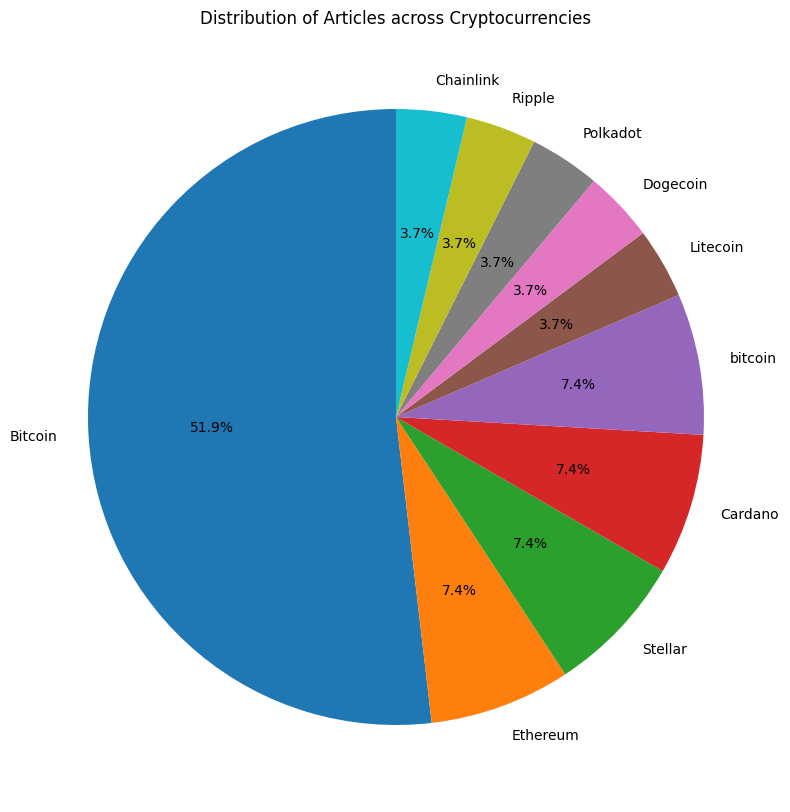

In [16]:
 
crypto_counts = df['title'].str.extract(r'(\bBitcoin\b|\bEthereum\b|\bRipple\b|\bLitecoin\b|\bCardano\b|\bPolkadot\b|\bStellar\b|\bDogecoin\b|\bChainlink\b|\bBitcoin Cash\b)', flags=re.IGNORECASE, expand=False)
crypto_counts = crypto_counts.value_counts()

plt.figure(figsize=(10, 10))
plt.pie(crypto_counts, labels=crypto_counts.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors, startangle=90)
plt.title('Distribution of Articles across Cryptocurrencies')
plt.show()


**Relationship between Article Length, Number of Unique Titles, and Number of Mentions of Companies**

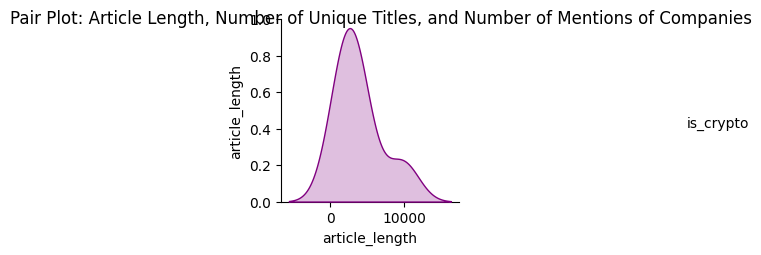

In [17]:
pair_plot_data_companies = df[['article_length', 'title', 'is_crypto']]
count_per_title = company_articles.groupby('title')['title'].count().reset_index(drop=True)
pair_plot_data_companies.loc[:, 'is_crypto'] = count_per_title

sns.pairplot(pair_plot_data_companies, hue='is_crypto', markers=['o', 's'], palette={0: 'skyblue', 1: 'purple'})
plt.suptitle('Pair Plot: Article Length, Number of Unique Titles, and Number of Mentions of Companies')
plt.show()


**Relationships between Article Length, Number of Unique Titles, and Number of Mentions of Exchanges**

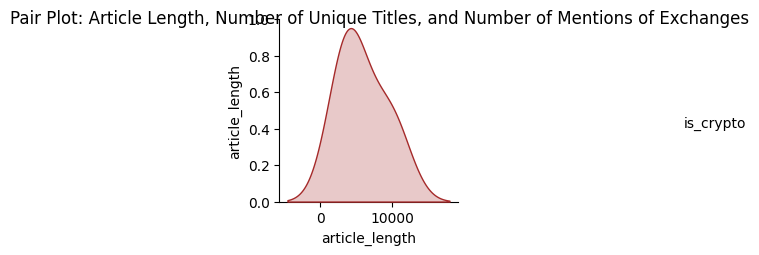

In [18]:
 
pair_plot_data_exchanges = df[['article_length', 'title', 'is_crypto']]
count_per_title_exchanges = exchange_articles.groupby('title')['title'].count().reset_index(drop=True)
pair_plot_data_exchanges.loc[:, 'is_crypto'] = count_per_title_exchanges

sns.pairplot(pair_plot_data_exchanges, hue='is_crypto', markers=['o', 's'], palette={0: 'skyblue', 1: 'brown'})
plt.suptitle('Pair Plot: Article Length, Number of Unique Titles, and Number of Mentions of Exchanges')
plt.show()


**Relationships between Article Length, Number of Unique Titles, and Number of Mentions of Cryptocurrencies**

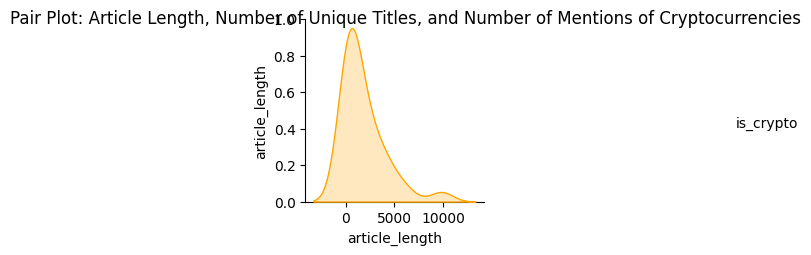

In [19]:
 
pair_plot_data_cryptos = df[['article_length', 'title', 'is_crypto']]
count_per_title_cryptos = crypto_articles.groupby('title')['title'].count().reset_index(drop=True)
pair_plot_data_cryptos.loc[:, 'is_crypto'] = count_per_title_cryptos

sns.pairplot(pair_plot_data_cryptos, hue='is_crypto', markers=['o', 's'], palette={0: 'skyblue', 1: 'orange'})
plt.suptitle('Pair Plot: Article Length, Number of Unique Titles, and Number of Mentions of Cryptocurrencies')
plt.show()


**Relationships between Article Length, Number of Unique Titles, and Number of Mentions of Historical Facts**

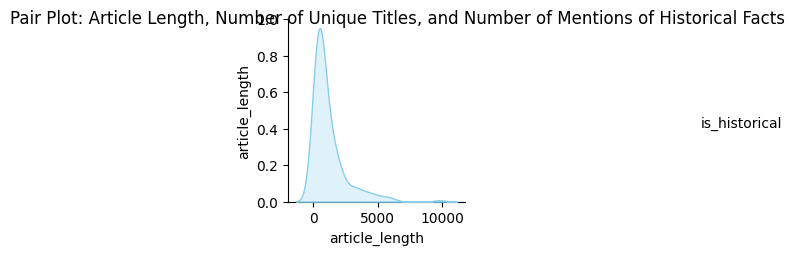

In [20]:
 
pair_plot_data_historical = df[['article_length', 'title', 'is_historical']]
pair_plot_data_historical.loc[:, 'is_historical'] = pair_plot_data_historical['is_historical'].astype(int)
 
pair_plot_data_historical.loc[:, 'is_historical'] = pair_plot_data_historical['is_historical'].astype(int)
 
sns.pairplot(pair_plot_data_historical, hue='is_historical', markers=['o', 's'], palette={0: 'skyblue', 1: 'green'})
plt.suptitle('Pair Plot: Article Length, Number of Unique Titles, and Number of Mentions of Historical Facts')
plt.show()
